# Whats API & Why is it important?  

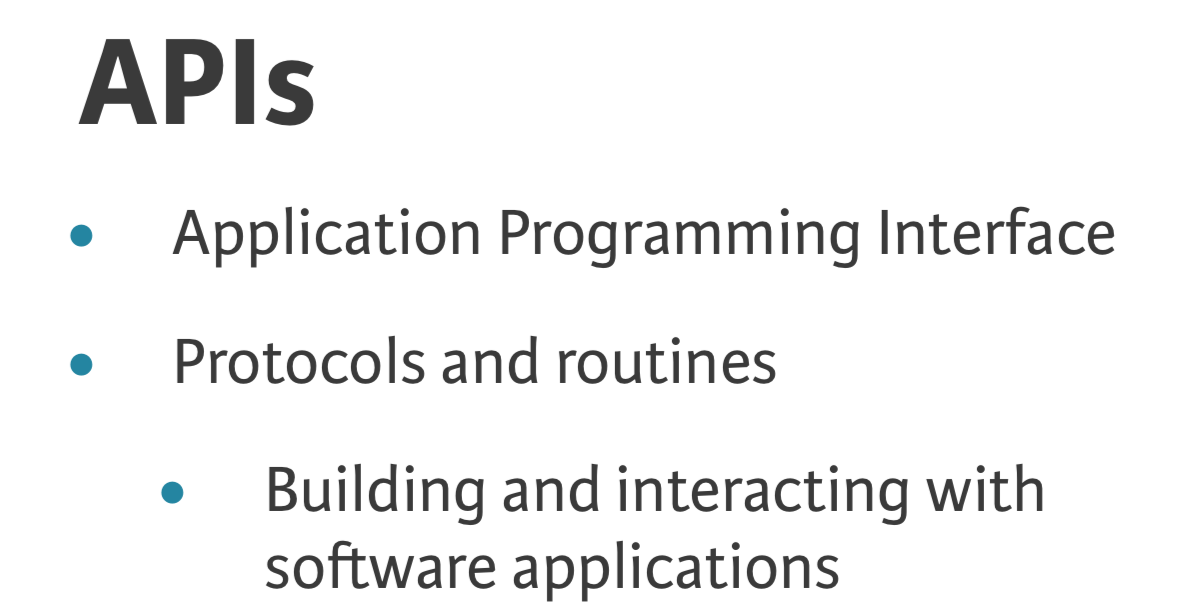

In [1]:
from IPython.display import Image
Image('API definition.png')

In simple words, an API is a (hypothetical) contract between 2 softwares saying if the user software provides input in a pre-defined format, the later with extend its functionality and provide the outcome to the user software. Think of it like this, Graphical user interface (GUI) or command line interface (CLI) allows humans to Interact with code, where as an Application programmable interface (API) allows one piece of code to interact with other code.

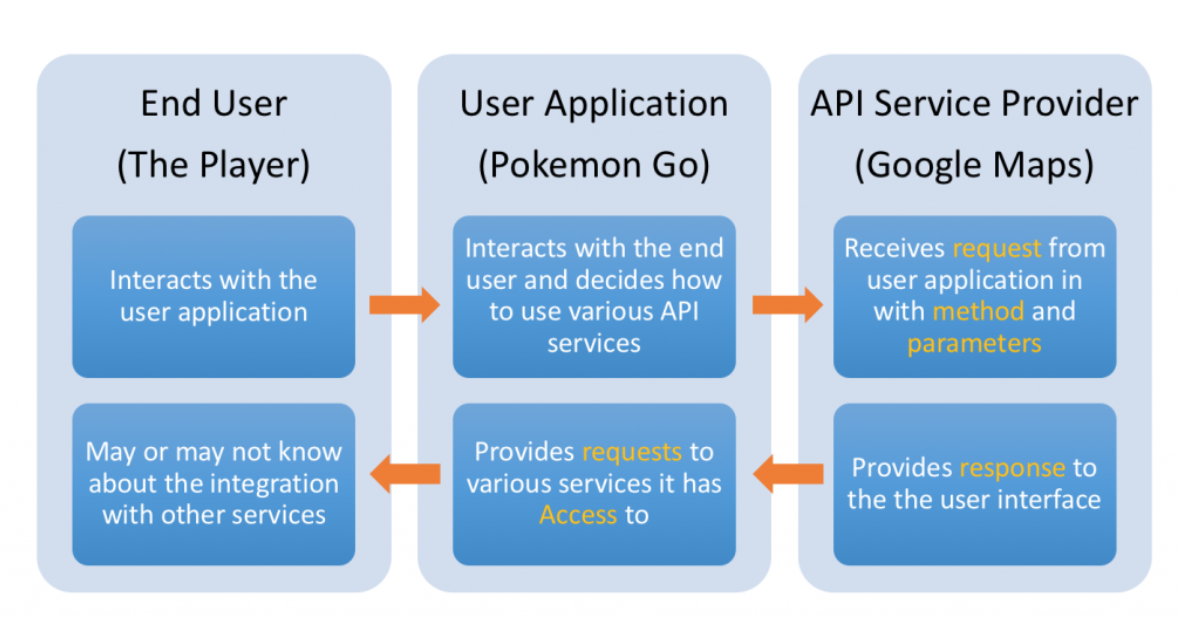

In [2]:
Image("API Example.png")

A good read: https://www.analyticsvidhya.com/blog/2016/11/an-introduction-to-apis-application-programming-interfaces-5-apis-a-data-scientist-must-know/

### API request status codes for reference

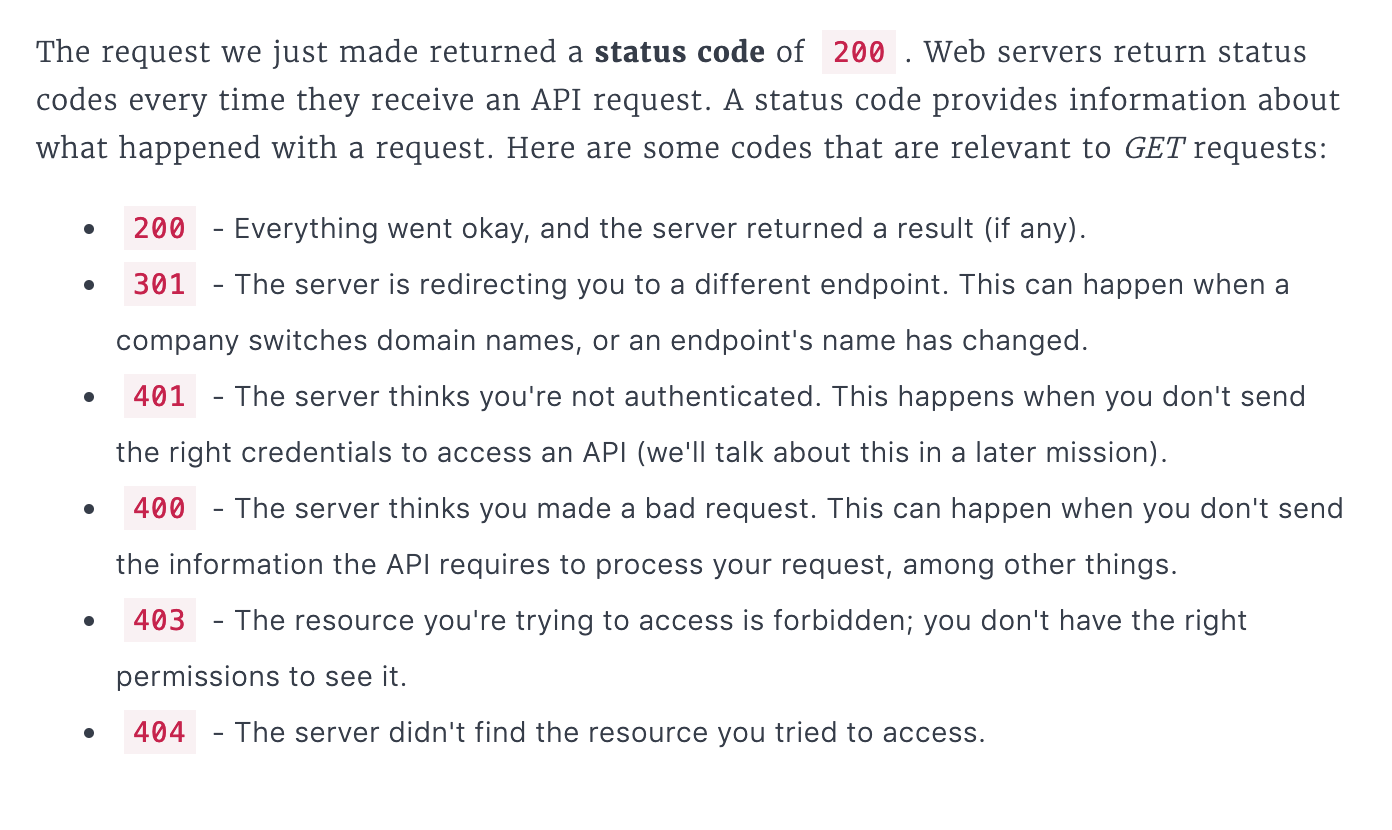

In [19]:
Image('api_request_status_code.png')

# Practice

#### 1. Use requests.get to extract details of Game of Thrones, Season 1

In [3]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

In [4]:
url='http://www.omdbapi.com/?apikey=72bc447a&t=Game of Thrones&Season=1' # Note we need an API key!

In [5]:
r=requests.get(url)

In [6]:
json_data=r.json()

In [7]:
json_data

{'Title': 'Game of Thrones',
 'Season': '1',
 'totalSeasons': '8',
 'Episodes': [{'Title': 'Winter Is Coming',
   'Released': '2011-04-17',
   'Episode': '1',
   'imdbRating': '9.0',
   'imdbID': 'tt1480055'},
  {'Title': 'The Kingsroad',
   'Released': '2011-04-24',
   'Episode': '2',
   'imdbRating': '8.8',
   'imdbID': 'tt1668746'},
  {'Title': 'Lord Snow',
   'Released': '2011-05-01',
   'Episode': '3',
   'imdbRating': '8.7',
   'imdbID': 'tt1829962'},
  {'Title': 'Cripples, Bastards, and Broken Things',
   'Released': '2011-05-08',
   'Episode': '4',
   'imdbRating': '8.8',
   'imdbID': 'tt1829963'},
  {'Title': 'The Wolf and the Lion',
   'Released': '2011-05-15',
   'Episode': '5',
   'imdbRating': '9.1',
   'imdbID': 'tt1829964'},
  {'Title': 'A Golden Crown',
   'Released': '2011-05-22',
   'Episode': '6',
   'imdbRating': '9.2',
   'imdbID': 'tt1837862'},
  {'Title': 'You Win or You Die',
   'Released': '2011-05-29',
   'Episode': '7',
   'imdbRating': '9.3',
   'imdbID': 't

#### 2. Convert the data into a pandas data frame

In [8]:
GoT=pd.DataFrame(json_data['Episodes'])

In [9]:
GoT

,Episode,Released,Title,imdbID,imdbRating
0,1,2011-04-17,Winter Is Coming,tt1480055,9.0
1,2,2011-04-24,The Kingsroad,tt1668746,8.8
2,3,2011-05-01,Lord Snow,tt1829962,8.7
3,4,2011-05-08,"Cripples, Bastards, and Broken Things",tt1829963,8.8
4,5,2011-05-15,The Wolf and the Lion,tt1829964,9.1
5,6,2011-05-22,A Golden Crown,tt1837862,9.2
6,7,2011-05-29,You Win or You Die,tt1837863,9.3
7,8,2011-06-05,The Pointy End,tt1837864,9.1
8,9,2011-06-12,Baelor,tt1851398,9.6
9,10,2011-06-19,Fire and Blood,tt1851397,9.5


#### 3. Add  remaining seasons to this dataframe

In [10]:
GoT=pd.DataFrame(json_data['Episodes'])
for i in range(2,9):
    url='http://www.omdbapi.com/?apikey=72bc447a&t=Game of Thrones&Season='+str(i)
    r=requests.get(url)
    js=r.json()
    episode=js['Episodes']
    GoT=GoT.append(pd.DataFrame(episode))

In [11]:
GoT.head()

,Episode,Released,Title,imdbID,imdbRating
0,1,2011-04-17,Winter Is Coming,tt1480055,9.0
1,2,2011-04-24,The Kingsroad,tt1668746,8.8
2,3,2011-05-01,Lord Snow,tt1829962,8.7
3,4,2011-05-08,"Cripples, Bastards, and Broken Things",tt1829963,8.8
4,5,2011-05-15,The Wolf and the Lion,tt1829964,9.1


##### Check datatypes, specially ratings and released
Change datatypes of ratings, release date using pd.to_numeric, pd.to_datetime.
ALso Get year using pd.DatetimeIndex

In [12]:
GoT.dtypes

Episode       object
Released      object
Title         object
imdbID        object
imdbRating    object
dtype: object

In [13]:
GoT['imdbRating']=pd.to_numeric(GoT['imdbRating'],errors='coerce')
GoT['Released']=pd.to_datetime(GoT['Released'], format='%Y-%m-%d')
GoT['Year'] = pd.DatetimeIndex(GoT['Released']).year


In [14]:
GoT.head()

,Episode,Released,Title,imdbID,imdbRating,Year
0,1,2011-04-17,Winter Is Coming,tt1480055,9.0,2011
1,2,2011-04-24,The Kingsroad,tt1668746,8.8,2011
2,3,2011-05-01,Lord Snow,tt1829962,8.7,2011
3,4,2011-05-08,"Cripples, Bastards, and Broken Things",tt1829963,8.8,2011
4,5,2011-05-15,The Wolf and the Lion,tt1829964,9.1,2011


In [15]:
GoT.dtypes

Episode               object
Released      datetime64[ns]
Title                 object
imdbID                object
imdbRating           float64
Year                   int64
dtype: object

#### 4. Analyze, visualize the data a bit;
#### 4a. lets analyze the ratings over time

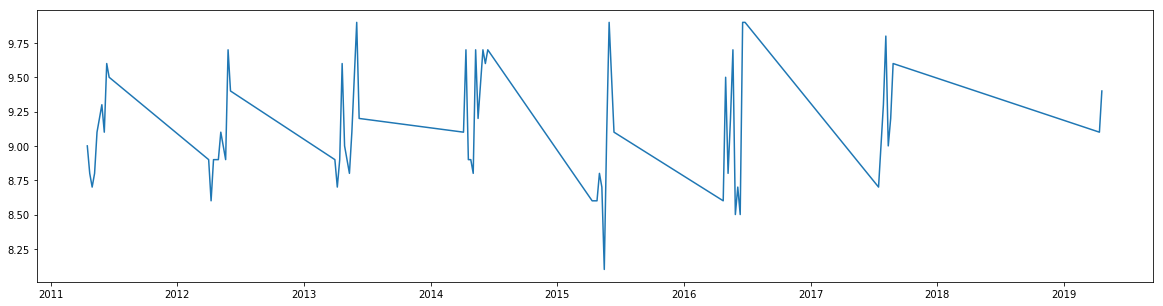

In [16]:
## Ratings over period of time
plt.figure(figsize=(20,5))
plt.plot(GoT['Released'],GoT['imdbRating'])


##### 4b. Ratings by episode number, multiple lines for Years

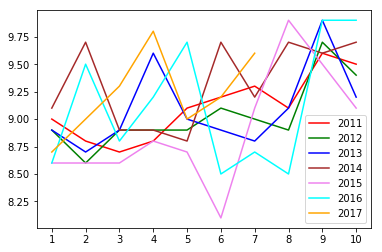

In [17]:
colors=['r','g','blue','brown','violet','cyan','orange','yellow','black']
for yr,c in zip(range(2011,2018),colors):
    GoT_yr=GoT[GoT['Year']==yr]
    plt.plot(GoT_yr['Episode'],GoT_yr['imdbRating'],color=c,label=yr)
plt.legend()

#### 4c. Whats average ratings in an year?

In [18]:
GoT.groupby('Year')['imdbRating'].mean()

Year
2011    9.110000
2012    9.030000
2013    9.100000
2014    9.330000
2015    8.900000
2016    9.130000
2017    9.228571
2019    9.250000
Name: imdbRating, dtype: float64

## Exercise: In pairs, find another (series/movies) data set from the OMDB API and extract relevant information.
#### 30 min + 10 min discussion
#### Be Creative!

## Assignment: Exporting the Weather Data
https://campus.elu.nl/courses/2/assignments/30


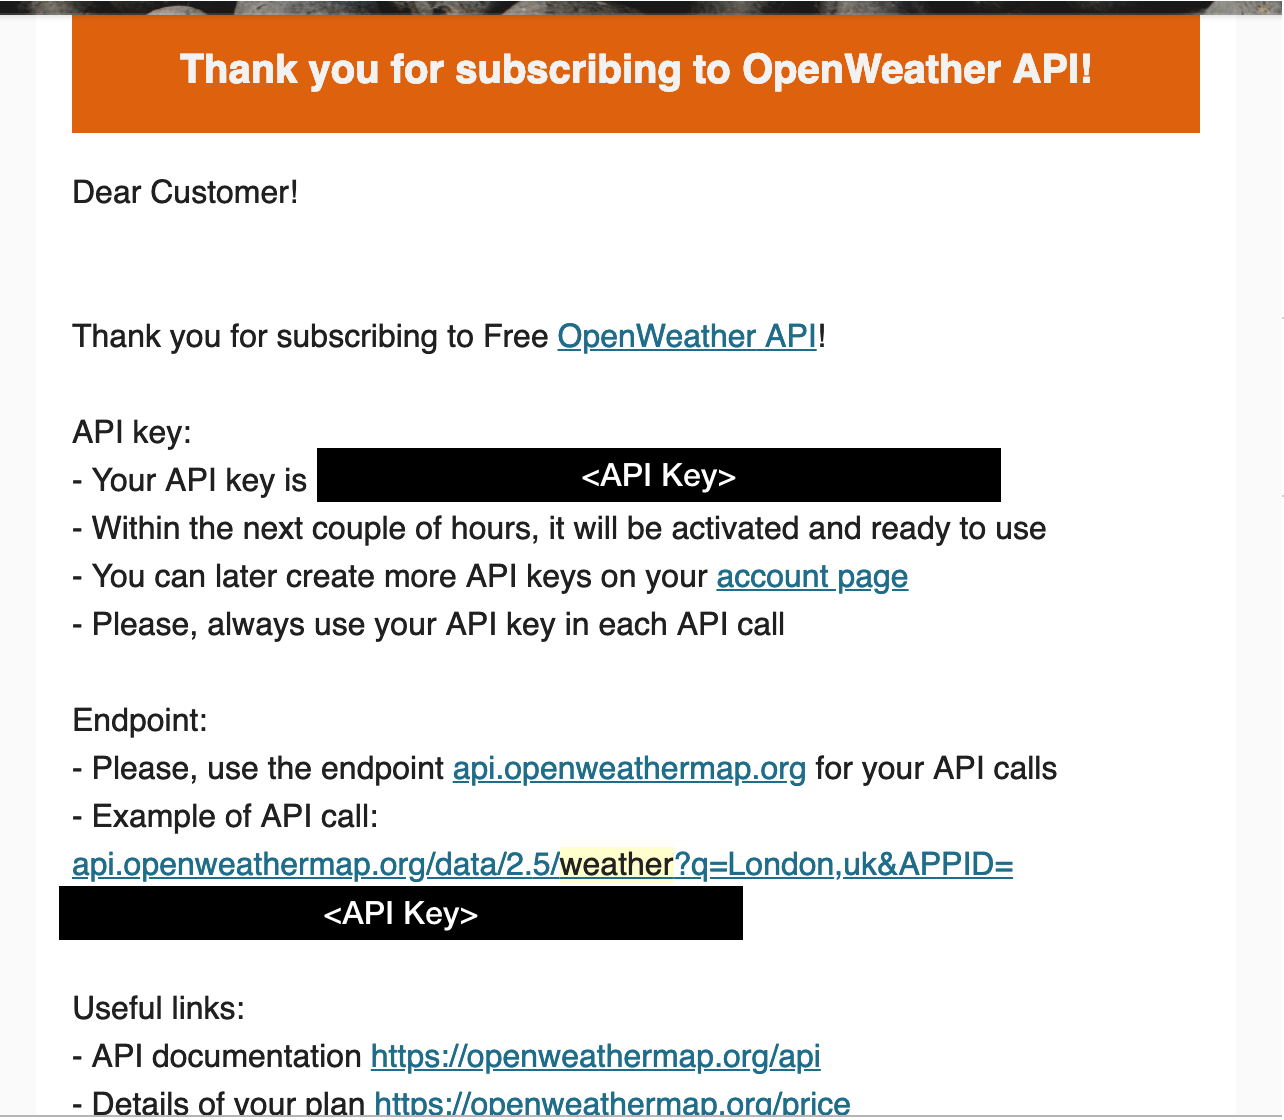

In [150]:
from IPython.display import Image
Image('email_weatherAPIsubscription.png')